In [1]:
print('sd')

sd


In [2]:
1+1

2

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


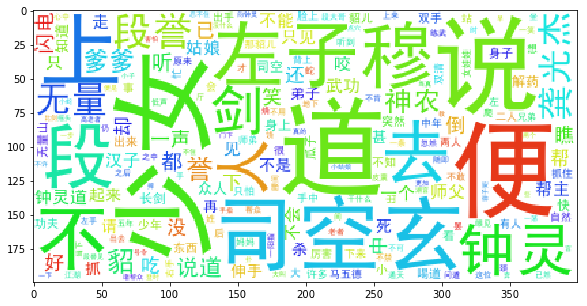

In [14]:
from urllib import request
from bs4 import BeautifulSoup
##-*- coding: UTF-8 -*-
import jieba   
import codecs
import re
import pandas as pd  
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包
response = request.urlopen("http://jinyong.zuopinj.com/2/43.html")
#print(response.read())
html_data = response.read()#.decode('utf-8')
#print(html_data) 
soup = BeautifulSoup(html_data,"html.parser")
body = soup.find_all(class_='ncon')
html = str(body)#.encode('utf-8')
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, html)
cleaned_txt = ''.join(filterdata)
segment = jieba.lcut(cleaned_txt)
words_df=pd.DataFrame({'segment':segment})
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)
 
wordcloud=wordcloud.fit_words(word_frequence_list)
plt.imshow(wordcloud)
